In [27]:
library(tidyverse)
options(repr.plot.width=10, repr.plot.height=6)
theme_set(theme_classic())

pwr_plot <- function(mu, n) {
    sd <- 1 / sqrt(n)
    curve(dnorm(x, mean=0, sd=sd), from=-3, to=3 + mu, col="blue")
    curve(dnorm(x, mean=mu, sd=sd), add=T, col="red")
    legend("topright", 
       legend = c("H0", "H1"),
       col = c("blue", "red"), 
       lwd = 2)
    abline(v=-2 * sd, lty=2)
    abline(v=2 * sd, lty=2)

}

# STATS 504
## Week 9: Power, effect size, reproducibility

## The Reproducibility Project
- From 2011-2015 researchers tried to replicate 100 studies from top psychology journals.
- Only 36% of studies were successfully replicated with statistically significant results.
- Effect sizes were approximately half that of the original findings.

> A large portion of replications produced weaker evidence for the original findings despite using materials provided by the original authors, review in advance for methodological fidelity, and high statistical power to detect the original effect sizes.

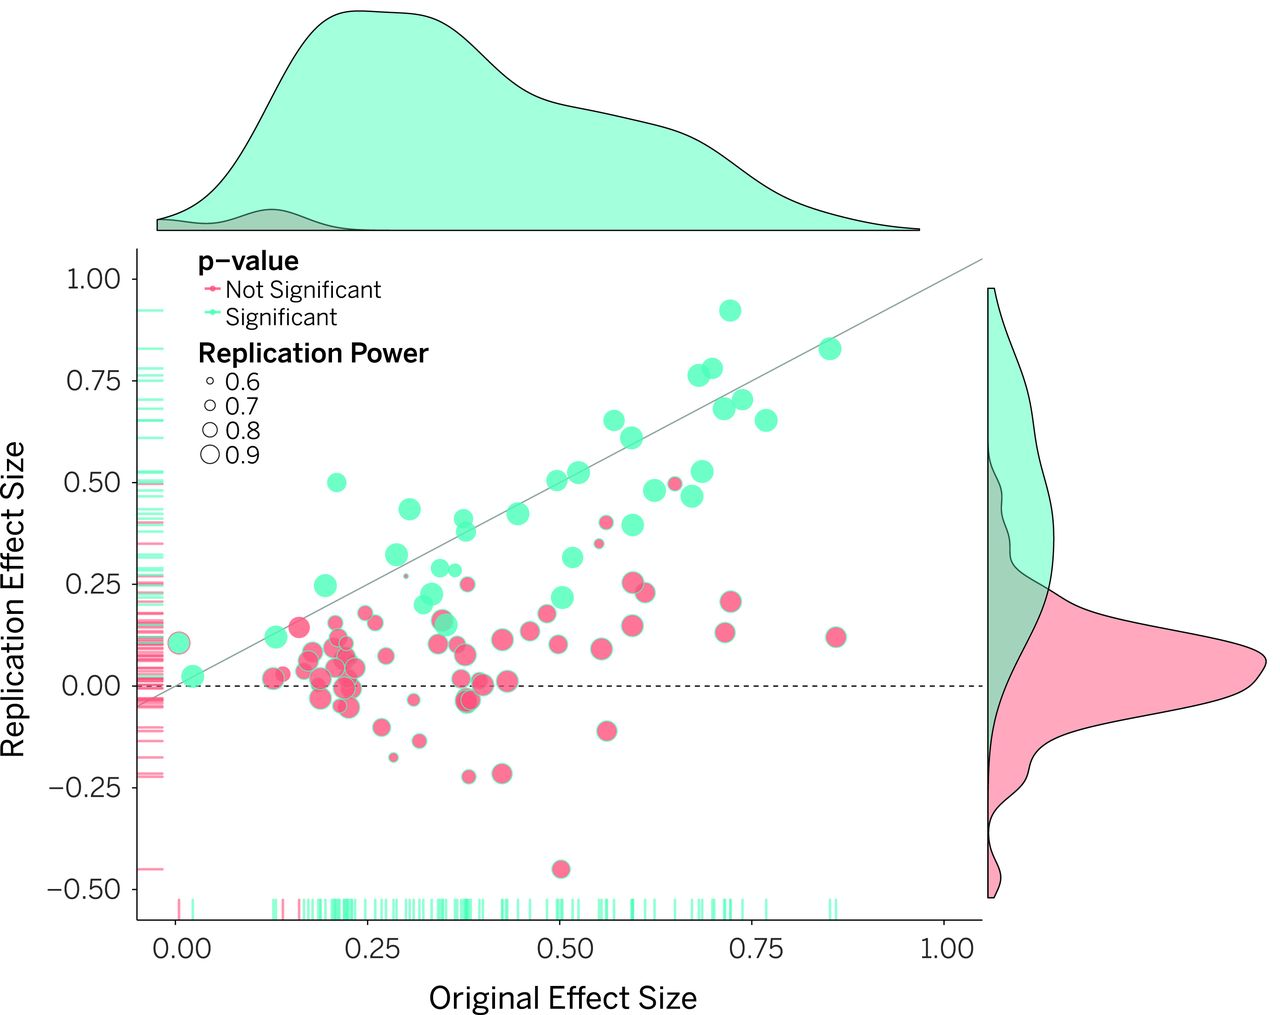

## Researcher degrees of freedom
Every statistical investigation requires you to make a sequence of choices about how to conduct, analyze and report the analysis.
- Data collection: how much data to collect?
- Analysis decisions: how are variables defined? What tests are used? What models are considered?
- What hypotheses will be tested? What results will be reported? Will multiple testing be considered?
- Maliciously exploiting these degrees of freedom is known as p-hacking.
- But even well-intentioned studies can mistakenly fall prey.

## False positive psychology

https://journals.sagepub.com/doi/10.1177/0956797611417632

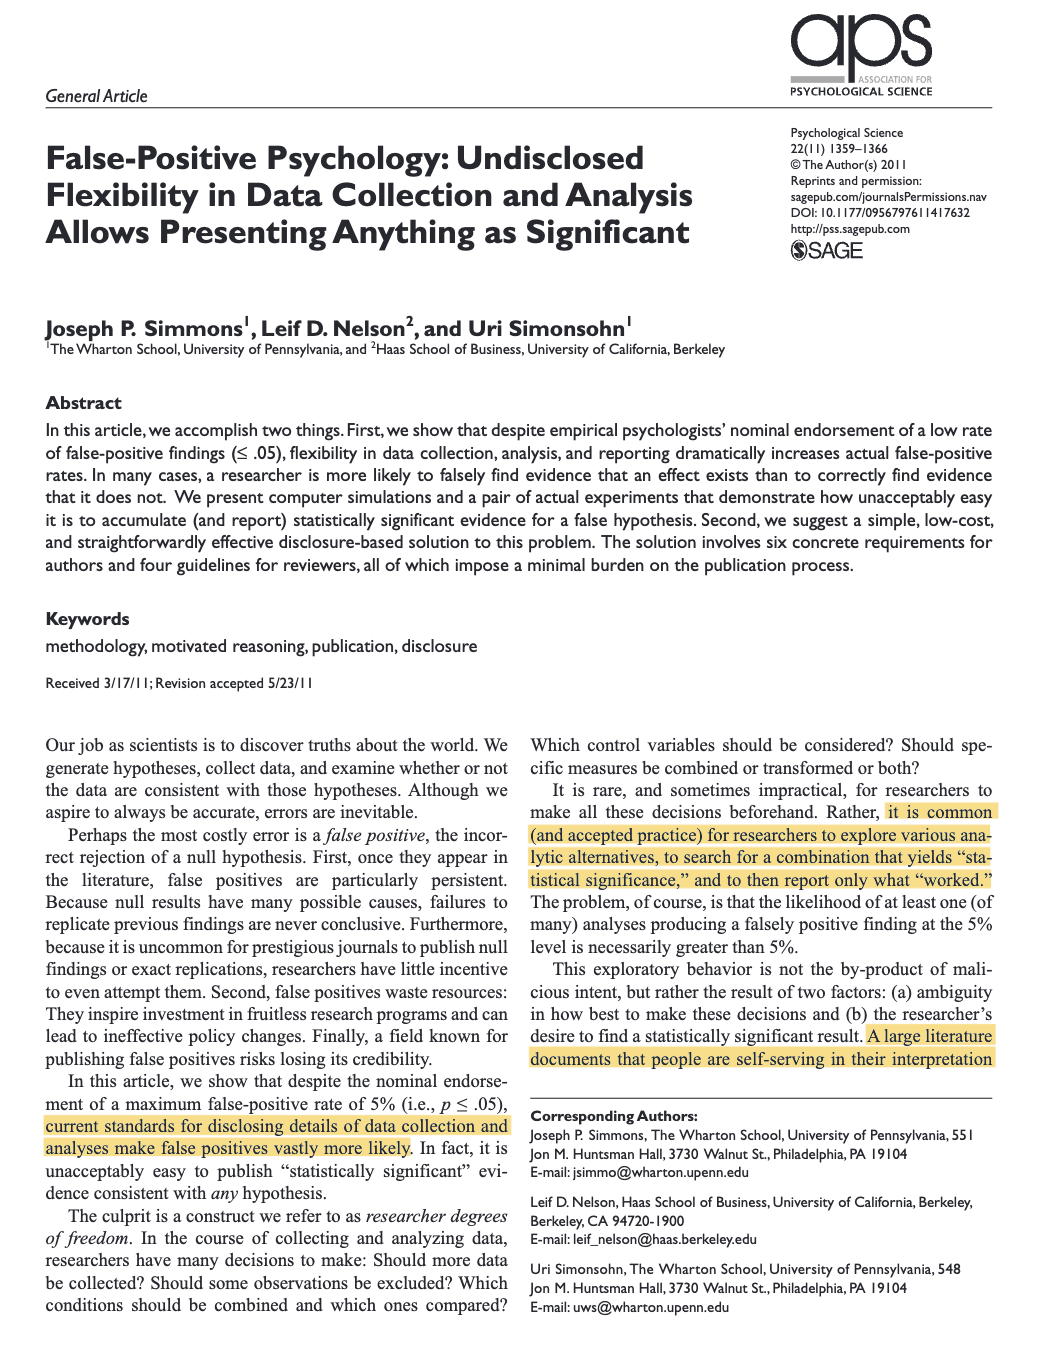

### Study 1: musical contrast and subjective age

<p role="paragraph">In Study 1, we investigated whether listening to a children’s song induces an age contrast, making people feel older. In exchange for payment, 30 University of Pennsylvania undergraduates sat at computer terminals, donned headphones, and were randomly assigned to listen to either a control song (“Kalimba,” an instrumental song by Mr. Scruff that comes free with the Windows 7 operating system) or a children’s song (“Hot Potato,” performed by The Wiggles).</p>
    
<p role="paragraph">After listening to part of the song, participants completed an ostensibly unrelated survey: They answered the question “How old do you feel right now?” by choosing among five options (<i>very young</i>, <i>young</i>, <i>neither young nor old</i>, <i>old</i>, and <i>very old</i>). They also reported their father’s age, allowing us to control for variation in baseline age across participants.</p>
    
<p role="paragraph">An analysis of covariance (ANCOVA) revealed the predicted effect: People felt older after listening to “Hot Potato” (adjusted <i>M</i> = 2.54 years) than after listening to the control song (adjusted <i>M =</i> 2.06 years), <i>F</i>(1, 27) = 5.06, <i>p</i> = .033.</p>

In [61]:
fppsy <- readr::read_csv(file = "http://rpository.com/ds4psy/data/falsePosPsy_all.csv")
fppsy

Rows: 78 Columns: 19
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): cond
dbl (18): study, ID, aged, aged365, female, dad, mom, potato, when64, kalimb...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


study,ID,aged,aged365,female,dad,mom,potato,when64,kalimba,cond,root,bird,political,quarterback,olddays,feelold,computer,diner
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,6765,18.53425,0,49,45,0,0,1,control,1,7,3,2,13,2,4,7
1,2,7715,21.13699,1,63,62,0,1,0,64,1,3,2,1,12,4,4,8
1,3,7630,20.90411,0,61,59,0,1,0,64,1,7,1,2,12,2,4,6
1,4,7543,20.66575,0,54,51,0,0,1,control,1,5,3,3,12,1,4,8
1,5,7849,21.50411,0,47,43,0,1,0,64,1,5,2,3,13,3,5,6
1,6,7581,20.76986,1,49,50,0,1,0,64,1,5,2,2,11,3,2,8
1,7,7534,20.64110,1,56,55,0,0,1,control,1,7,2,2,13,3,4,8
1,8,6678,18.29589,1,45,45,0,1,0,64,1,3,4,1,11,3,4,6
1,9,6970,19.09589,0,53,51,1,0,0,potato,1,7,2,4,13,2,2,8


In [74]:
fppsy %>% filter(study == 1, !when64) %>% 
    lm(feelold ~ dad + cond, data = .) %>%
    summary


Call:
lm(formula = feelold ~ dad + cond, data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.07856 -0.45790 -0.05732  0.46778  1.40938 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  0.93189    1.51637   0.615   0.5440  
dad          0.02123    0.02796   0.759   0.4542  
condpotato   0.49083    0.21825   2.249   0.0329 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5763 on 27 degrees of freedom
Multiple R-squared:  0.1594,	Adjusted R-squared:  0.09709 
F-statistic: 2.559 on 2 and 27 DF,  p-value: 0.096


#### Study 2: musical contrast and chronological rejuvenation

    
<p role="paragraph">In Study 2, we sought to conceptually replicate and extend Study 1. Having demonstrated that listening to a children’s song makes people feel older, Study 2 investigated whether listening to a song about older age makes people <i>actually</i> younger.</p>

<p>Using the same method as in Study 1, we asked 20 University of Pennsylvania undergraduates to listen to either “When I’m Sixty-Four” by The Beatles or “Kalimba.” Then, in an ostensibly unrelated task, they indicated their birth date (mm/dd/yyyy) and their father’s age. We used father’s age to control for variation in baseline age across participants.</p>

<p role="paragraph">An ANCOVA revealed the predicted effect: According to their birth dates, people were nearly a year-and-a-half younger after listening to “When I’m Sixty-Four” (adjusted <i>M</i> = 20.1 years) rather than to “Kalimba” (adjusted <i>M</i> = 21.5 years), <i>F</i>(1, 17) = 4.92, <i>p</i> = .040.</p>

In [82]:
# study 2
fppsy %>% filter(study == 2, !potato) %>% 
    lm(aged365 ~ . - aged, data = .) %>% 
    summary


Call:
lm(formula = aged365 ~ . - aged, data = .)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6826 -0.4247 -0.1010  0.3685  1.1154 

Coefficients: (5 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  4.15959    4.74842   0.876   0.4101  
study             NA         NA      NA       NA  
ID          -0.05931    0.03227  -1.838   0.1087  
female      -0.02181    0.75502  -0.029   0.9778  
dad          0.16750    0.06471   2.588   0.0360 *
mom          0.21184    0.08748   2.422   0.0460 *
potato            NA         NA      NA       NA  
when64      -1.71311    0.54523  -3.142   0.0163 *
kalimba           NA         NA      NA       NA  
condcontrol       NA         NA      NA       NA  
root              NA         NA      NA       NA  
bird         0.21164    0.18006   1.175   0.2783  
political   -0.06956    0.38195  -0.182   0.8606  
quarterback -0.10770    0.34366  -0.313   0.7631  
olddays     -0.17215    0.35836  -0

## Researcher DOF

<table><thead><tr data-xml-align="center"><td>&nbsp;</td><th colspan="3"><span>Significance level</span></th></tr><tr data-xml-align="center"><th data-xml-align="left">Researcher degrees of freedom</th><th><i>p</i> &lt; .1</th><th><i>p</i> &lt; .05</th><th><i>p</i> &lt; .01</th></tr></thead><tbody><tr data-xml-align="center"><td data-xml-align="left">Situation A: two dependent variables (<i>r</i> = .50)</td><td>17.8%</td><td>9.5%</td><td>2.2%</td></tr><tr data-xml-align="center"><td data-xml-align="left">Situation B: addition of 10 more observations per cell</td><td>14.5%</td><td>7.7%</td><td>1.6%</td></tr><tr data-xml-align="center"><td data-xml-align="left">Situation C: controlling for gender or interaction of gender with treatment</td><td>21.6%</td><td>11.7%</td><td>2.7%</td></tr><tr data-xml-align="center"><td data-xml-align="left">Situation D: dropping (or not dropping) one of three conditions</td><td>23.2%</td><td>12.6%</td><td>2.8%</td></tr><tr data-xml-align="center"><td data-xml-align="left">Combine Situations A and B</td><td>26.0%</td><td>14.4%</td><td>3.3%</td></tr><tr data-xml-align="center"><td data-xml-align="left">Combine Situations A, B, and C</td><td>50.9%</td><td>30.9%</td><td>8.4%</td></tr><tr data-xml-align="center"><td data-xml-align="left">Combine Situations A, B, C, and D</td><td>81.5%</td><td>60.7%</td><td>21.5%</td></tr></tbody></table>


How likely is a false positive if I can choose among several dependent variables to report?

In [85]:
sim.A <- function() {
    X <- rnorm(n = 20)
    Y <- .5 * X + sqrt(1 - .5^2) * rnorm(n = 20)
    p.values <- list(X, Y, (X + Y) / 2) %>% map_dbl(\(v) t.test(v)$p.value)
    min(p.values) < 0.01
}

replicate(sim.A(), n = 10000) %>% mean

[1] 0.0196

What if I can collect additional data?

In [86]:
sim.B <- function() {
    X <- rnorm(n = 20)
    p.values <- list(X, c(X, rnorm(n = 10))) %>% map_dbl(\(v) t.test(v)$p.value)
    min(p.values) < 0.05
}

replicate(sim.B(), n = 100000) %>% mean

[1] 0.07809

## Type S error

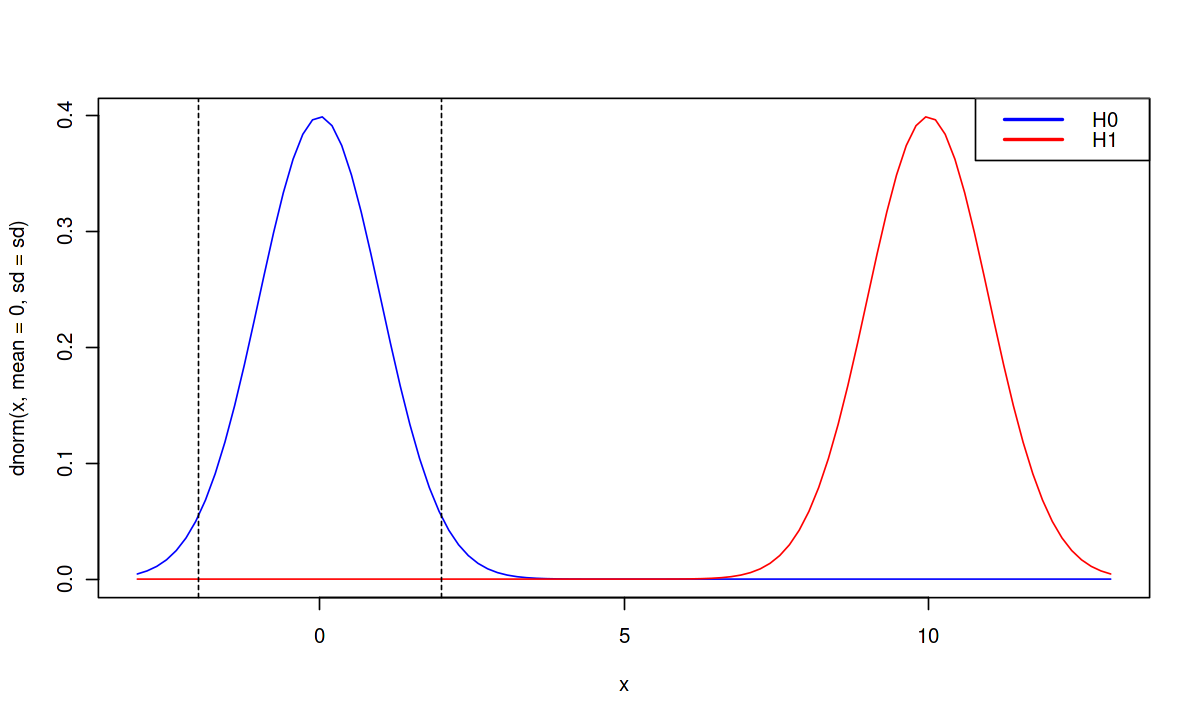

In [93]:
pwr_plot(10, 1)

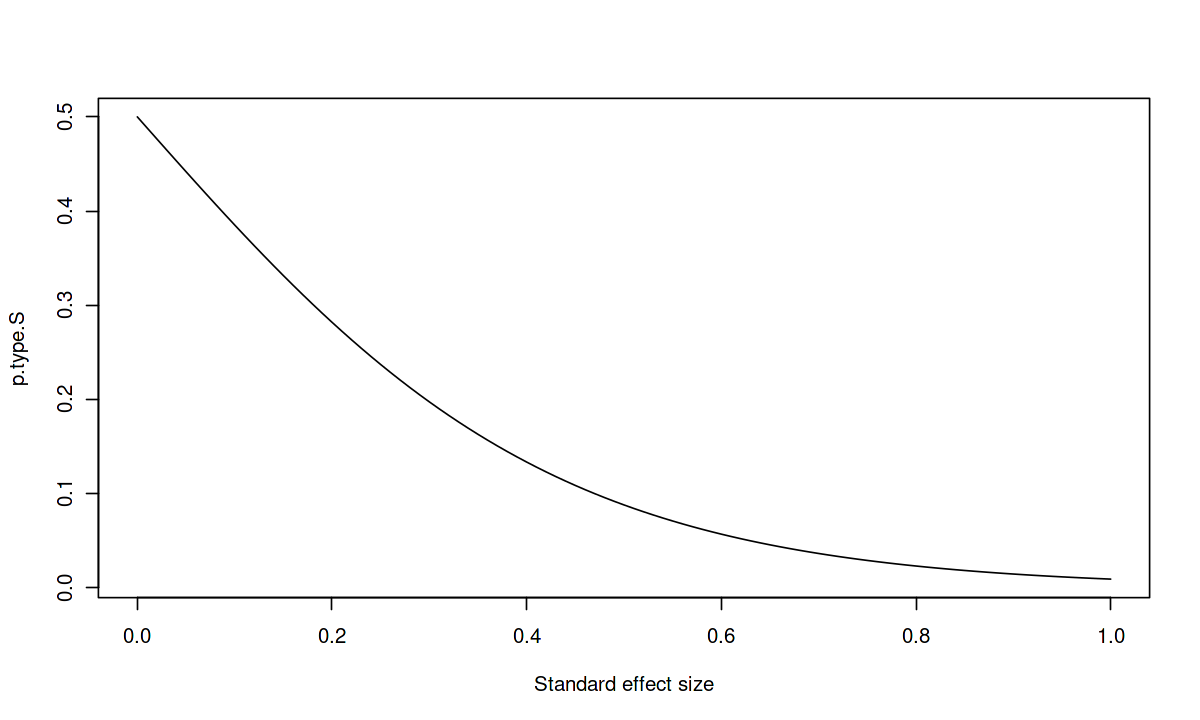

In [90]:
p.type.S <- function(mu) {
    a <- pnorm(-1.96, mean=mu)
    b <- 1 - pnorm(1.96, mean=mu)
    a / (a+b)
}

plot(p.type.S, xlab="Standard effect size")

## Beauty and sex ratio

In [67]:
library(rstanarm)

fit <- stan_glm(y ~ x,
                data = df,
                prior = normal(0, .01 / 3), # |beta| <= 0.01 with high prob
                family = gaussian())

# summary(fit)

ERROR: Error in library(rstanarm): there is no package called ‘rstanarm’


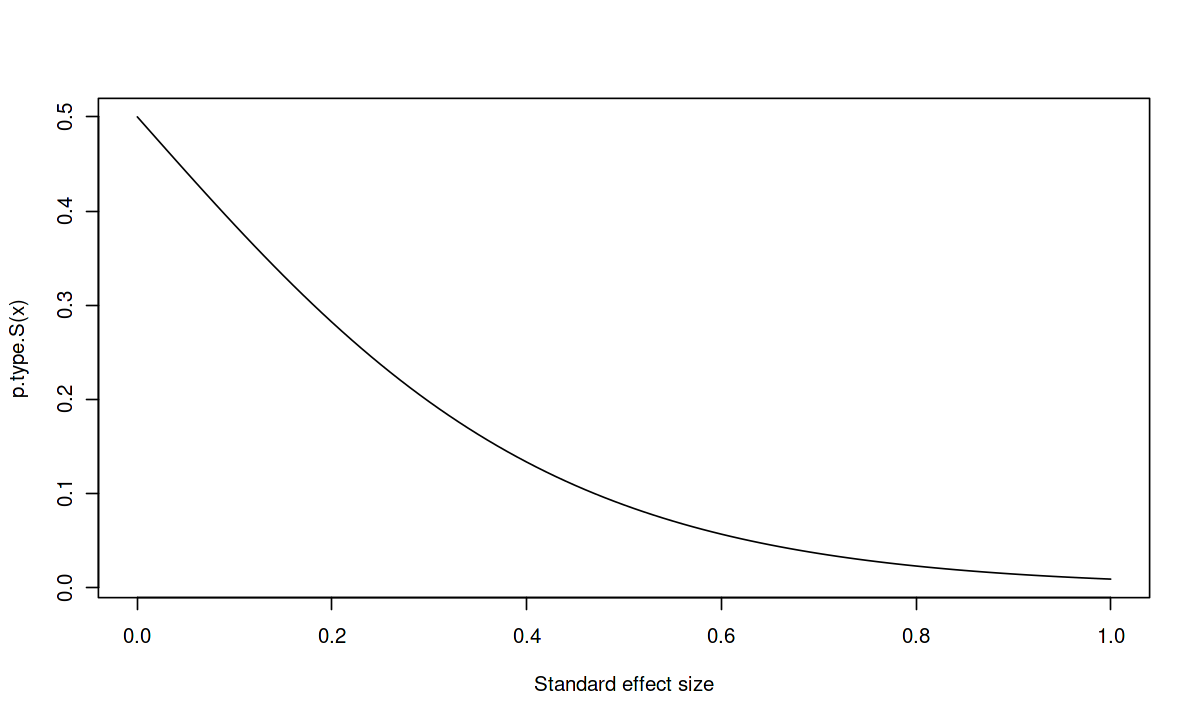

In [34]:
# Type S error

p.type.S <- function(mu) {
    a <- pnorm(-1.96, mean=mu)
    b <- 1 - pnorm(1.96, mean=mu)
    a / (a+b)
}

curve(p.type.S, xlab="Standard effect size")

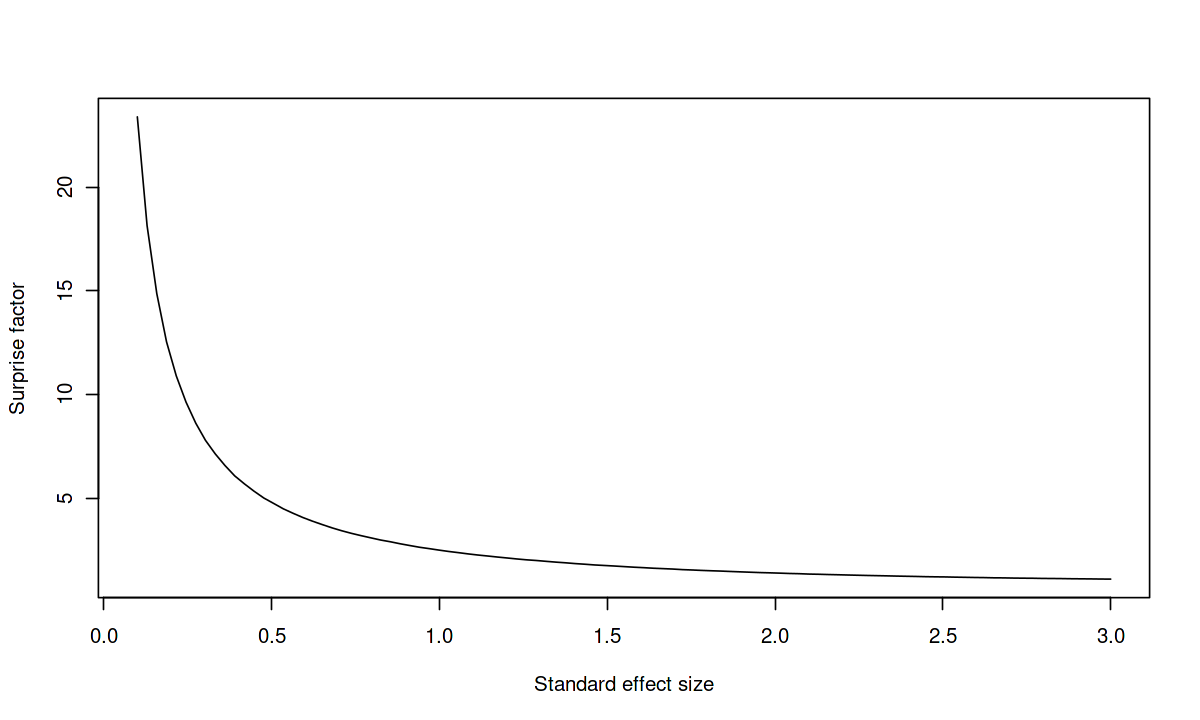

In [94]:
# Type M error

E.type.M <- function(mu) {
    X <- rnorm(n = 100000, mean = mu)
    sig <- abs(X) > 1.96
    X_sig <- X[sig]
    mean(abs(X_sig / mu))
}

curve(Vectorize(E.type.M)(x), from=0.1, to=3.0, xlab="Standard effect size", y="Surprise factor")

In [105]:
# library(readxl)
# download.file('http://stat.columbia.edu/~gelman/research/beautiful/beautiful%20people%20kids2.xls', 'bp.xls')
# bp <- read_excel('bp.xls')
bp <- read_csv("bp.csv") 

bp %>% mutate(ratio = sons / (sons + daughters)) %>% pluck("ratio") %>% t.test

New names:
• `` -> `...5`
• `` -> `...6`
Rows: 300 Columns: 6
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Person
dbl (3): sons, daughters, year
lgl (2): ...5, ...6

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



	One Sample t-test

data:  .
t = 16.093, df = 167, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 0.4243939 0.5430806
sample estimates:
mean of x 
0.4837372 


Warning message in X_sig/mu:
“longer object length is not a multiple of shorter object length”


[1] Inf

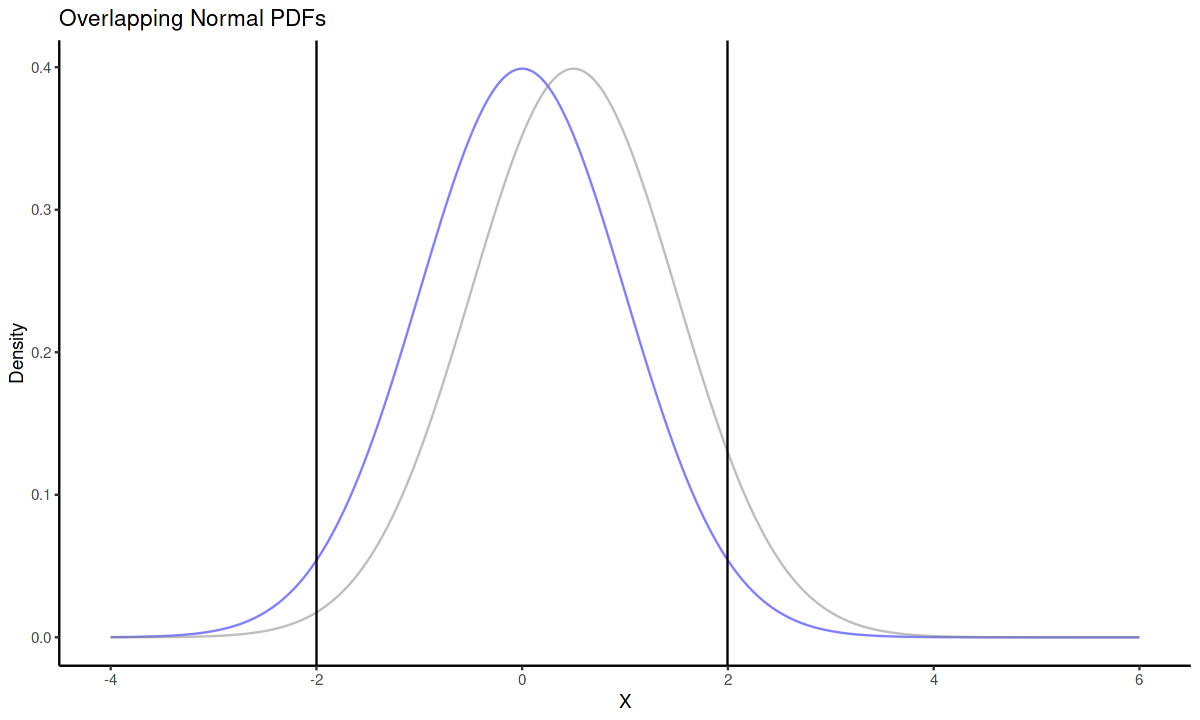

In [76]:
library(ggplot2)
library(dplyr)

# Generate data for normal PDFs
x_values <- seq(-4, 6, by = 0.01)
normal_data <- expand.grid(x = x_values, mean = c(0, .5)) %>%
  mutate(density = dnorm(x, mean = mean, sd = 1),
         color = if_else(mean == 0, "blue", "red"))

# Plot
ggplot(normal_data, aes(x = x, y = density, group = factor(mean), fill = factor(mean))) +
  geom_line(alpha = 0.5, aes(color = factor(mean))) +
  geom_vline(xintercept = c(-2, 2)) +
  scale_fill_manual(values = c("0" = "blue", "2" = "red")) +
  scale_color_manual(values = c("0" = "blue", "2" = "red")) +
  labs(title = "Overlapping Normal PDFs", x = "X", y = "Density") +
  theme_classic() +
  guides(fill = FALSE, color = FALSE) # Remove legend

In [71]:
qt(1 - 0.035 / 2, df = 134)

pt(2.13, df = 134)

err <- 17 / 2.13

2 / err

[1] 2.12999

[1] 0.9825004

[1] 0.2505882

In [2]:
library(tidyverse)

── Attaching core tidyverse packages ────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
